In [1]:
# import the urllib library
import urllib.request
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import json
from GHCND import *

In [2]:
ghn = GHCND()
ghn.readCountriesFile()
ghn.readStationsFile()

Read 219 countries and codes
Read 991 stations with justGSN


In [3]:

# Get list of station names
station_names = ghn.getStatKeyNames()

# get url for a given station index
whichStat1 = 9
fileName = station_names[whichStat1]+'.dly'
urlName = 'http://www.hep.ucl.ac.uk/undergrad/0056/other/projects/ghcnd/ghcnd_gsn/' + fileName

# copy station data from remote to local
destination = f"data/{fileName}"
urllib.request.urlretrieve(urlName, destination)
statDict1 = ghn.processFile(destination)
print(ghn.getStation(station_names[whichStat1]))


AO000066160 is LUANDA, Angola at -8.85 13.233 74.0


In [ ]:
var1 = Variable(ghn.getVar(statDict1, 'TMAX'), "max temp (degC)", ghn.stationDict[station_names[whichStat1]].name)
var1.convert_time()

fig, ax = plt.subplots()
ax.plot(var1.get_dates(), var1.get_vals())
ax.set_xlabel("Days since first recording")
ax.set_ylabel(f"{var1.get_label()}")
ax.legend((var1.get_station()))


### Find station with the least number of gaps in max_temp data

In [ ]:
f = open('stat_counts_tmax.txt')
data = json.load(f)

# find all stations with no data gaps
no_gaps_tmax = [k for k, v in data.items() if v == 0]

### Interpolate data gaps

In [ ]:
# loop through values
# get values either side of gaps
# ...?

In [ ]:
# using pandas interpolation:
data = [0, 1, 2, np.nan, 4, 5, 6, 7, 8, 9]
df = pd.DataFrame(data)
df.interpolate(method = "polynomial", order = 1)

In [ ]:
ghn = GHCND()
ghn.readCountriesFile()
ghn.readStationsFile()

In [ ]:
# Get list of station names
station_names = ghn.getStatKeyNames()

# get url for a given station index
whichStat1 = 64
fileName = station_names[whichStat1]+'.dly'
urlName = 'http://www.hep.ucl.ac.uk/undergrad/0056/other/projects/ghcnd/ghcnd_gsn/' + fileName

# copy station data from remote to local
destination = f"data/{fileName}"
urllib.request.urlretrieve(urlName, destination)
statDict1 = ghn.processFile(destination)
print(ghn.getStation(station_names[whichStat1]))

In [ ]:
var1 = Variable(ghn.getVar(statDict1, 'TMAX'), "max temp (degC)", ghn.stationDict[station_names[whichStat1]].name)
var1.convert_time()
vals = var1.get_vals()

fig, ax = plt.subplots()
ax.plot(var1.get_dates(), var1.get_vals())
ax.set_xlabel("Days since first recording")
ax.set_ylabel(f"{var1.get_label()}")
ax.legend((var1.get_station()))

In [ ]:
df = pd.DataFrame(vals)
df.interpolate(method = "polynomial", order = 2)

In [ ]:
fig, ax = plt.subplots()
ax.plot(var1.get_dates(), vals)
ax.set_xlabel("Days since first recording")
ax.set_ylabel(f"{var1.get_label()}")
ax.legend((var1.get_station()))

In [4]:
var2 = Variable(ghn.getVar(statDict1, 'TMAX'), "max temp (degC)", ghn.stationDict[station_names[whichStat1]].name)
vals, dates = var2.get_annual_vals(1963)
len(dates)

347

In [1]:
from mpl_toolkits.basemap import Basemap
from PIL import Image as im
import matplotlib.pyplot as plt
import numpy as np
import json
from GHCND import *

In [2]:
# open json file containing the number of data gaps for the stations
f = open('data/stat_counts_tmax.json')
data = json.load(f)

# find all stations with no data gaps
no_gaps_tmax = [name for name, count in data.items() if count <= 100]
print(f"Number of stations found: {len(no_gaps_tmax)}")

Number of stations found: 103


In [3]:
# create instance of the GHCND class and extract information on countries and stations from their respective files
ghn = GHCND()
ghn.readCountriesFile()
ghn.readStationsFile()

# get list of station names
station_names = ghn.getStatKeyNames()

# set station to be investigated
station = no_gaps_tmax[0]
print(f"Station selected: {station}")

# get url for a specified station
fileName = f"{station}.dly"
print(f"Filename: {fileName}")
urlName = f"http://www.hep.ucl.ac.uk/undergrad/0056/other/projects/ghcnd/ghcnd_gsn/{fileName}"
print(f"url name: {urlName}")

# copy station data from remote to local
destination = f"data/{fileName}"
print(f"destination: {destination}")
urllib.request.urlretrieve(urlName, destination)
station_data = ghn.processFile(destination)
print(f"Station details: {ghn.getStation(station)}")

Read 219 countries and codes
Read 991 stations from the GSN
Station selected: ASN00003003
Filename: ASN00003003.dly
url name: http://www.hep.ucl.ac.uk/undergrad/0056/other/projects/ghcnd/ghcnd_gsn/ASN00003003.dly
destination: data/ASN00003003.dly
Station details: ASN00003003 is BROOME AIRPORT, Australia at -17.9475 122.2353 7.4


In [4]:
print(ghn.stationDict[station].lon)

122.2353


In [5]:
# create instance of the GHCND class and extract information on countries and stations from their respective files
ghn = GHCND()
ghn.readCountriesFile()
ghn.readStationsFile()



Read 219 countries and codes
Read 991 stations from the GSN


In [6]:
lons = []
lats = []

for i in range(len(ghn.stationDict)):
    lons.append(ghn.stationDict[station_names[i]].lon)
    lats.append(ghn.stationDict[station_names[i]].lat)

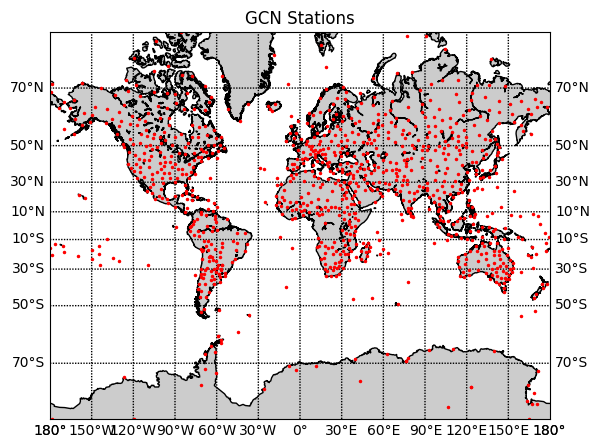

<Figure size 640x480 with 0 Axes>

In [8]:
# create new figure, axes instances.
fig = plt.figure(figsize = (10, 10))
ax = fig.add_axes([0.5,0.5,0.5,0.5])
# setup mercator map projection.
map = Basemap(llcrnrlon=-180.,llcrnrlat=-80.,urcrnrlon=180.,urcrnrlat=80.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)
map.drawcoastlines()
map.fillcontinents()
map.drawparallels(np.arange(-90,90,20),labels=[1,1,0,1])
map.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
ax.set_title('GCN Stations')

for i in range(len(lats)):
    x, y = map(lons[i], lats[i])
    map.plot(x, y, 'ro', markersize = 1.5)
plt.show()
plt.savefig('report/all_stations.svg', format = 'svg')
